<a href="https://colab.research.google.com/github/viochris/contoh/blob/master/Boston_Housing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


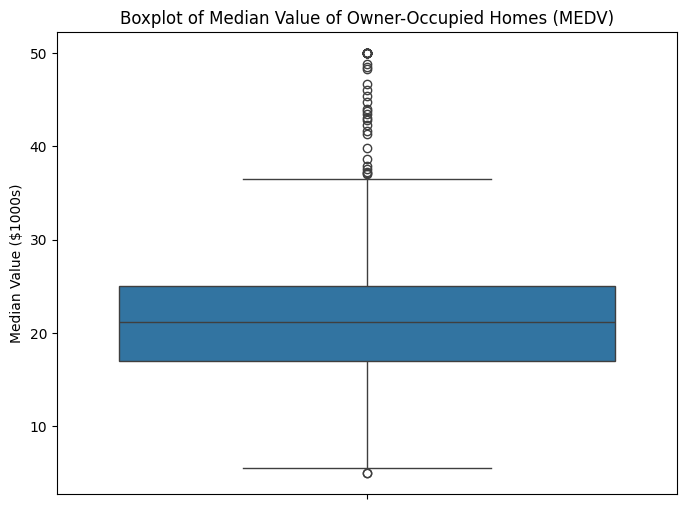

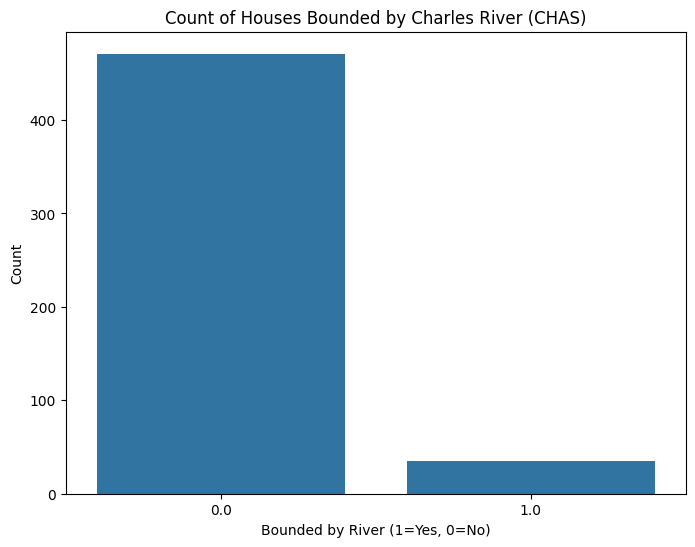

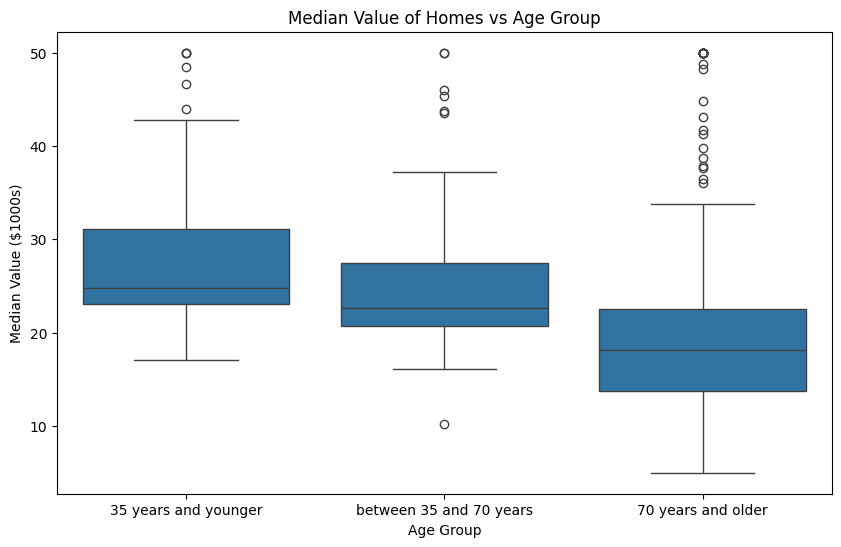

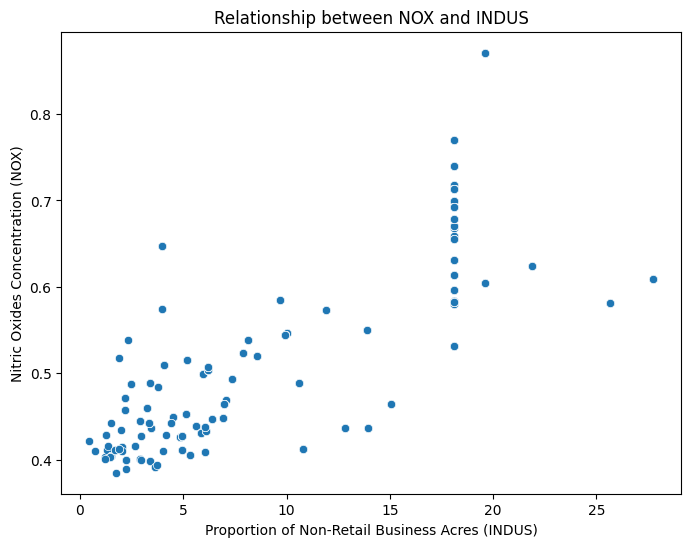

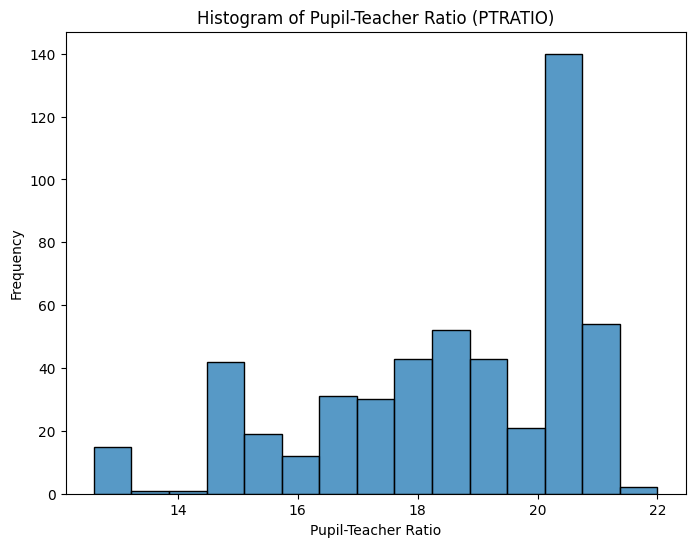


--- STATISTICAL TESTS ---

1. T-Test: MEDV based on CHAS
   Statistic: 3.996437466090509, p-value: 7.390623170519905e-05
   Conclusion: Reject Null Hypothesis. There is a significant difference.

2. ANOVA: MEDV based on AGE groups
   F_Statistic: 36.40764999196598, p-value: 1.7105011022702984e-15
   Conclusion: Reject Null Hypothesis. There is a significant difference in MEDV among age groups.

3. Pearson Correlation: NOX vs INDUS
   Pearson Coefficient: 0.7636514469209154, p-value: 7.913361061239639e-98
   Conclusion: Reject Null Hypothesis. There is a significant correlation between NOX and INDUS.

4. Regression Analysis: Impact of DIS on MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 30 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# ---------------------------------------------------------
# TASK 1: LOAD DATASET
# ---------------------------------------------------------
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

print("Dataset loaded successfully!")
print(boston_df.head())

# ---------------------------------------------------------
# TASK 2: VISUALIZATIONS
# ---------------------------------------------------------

# 1. Boxplot for the "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 2. Bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Count of Houses Bounded by Charles River (CHAS)')
plt.xlabel('Bounded by River (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

# 3. Boxplot for MEDV vs AGE variable (Discretized)
# Discretize age into 3 groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MEDV', data=boston_df, order=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title('Median Value of Homes vs Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# 4. Scatter plot: Nitric oxide (NOX) vs Non-retail business acres (INDUS)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between NOX and INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()
# Finding: There seems to be a positive correlation; as industrial area increases, NOX concentration tends to increase.

# 5. Histogram for the pupil to teacher ratio variable (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=False, bins=15)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

# ---------------------------------------------------------
# TASK 3: STATISTICAL TESTS
# ---------------------------------------------------------
print("\n--- STATISTICAL TESTS ---\n")

# Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?
# Test: T-test for independent samples
# H0 (Null): There is NO difference in mean MEDV between houses bounded by Charles River and those not.
# H1 (Alt): There IS a difference in mean MEDV.
print("1. T-Test: MEDV based on CHAS")
scipy_ttest = stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                              boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var=True)
print(f"   Statistic: {scipy_ttest.statistic}, p-value: {scipy_ttest.pvalue}")
if scipy_ttest.pvalue < 0.05:
    print("   Conclusion: Reject Null Hypothesis. There is a significant difference.")
else:
    print("   Conclusion: Fail to Reject Null Hypothesis.")

# Question 2: Is there a difference in Median values of houses (MEDV) for each AGE group?
# Test: ANOVA
# H0: The means of MEDV are equal across all age groups.
# H1: At least one mean of MEDV is different.
print("\n2. ANOVA: MEDV based on AGE groups")
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(f"   F_Statistic: {f_statistic}, p-value: {p_value}")
if p_value < 0.05:
    print("   Conclusion: Reject Null Hypothesis. There is a significant difference in MEDV among age groups.")
else:
    print("   Conclusion: Fail to Reject Null Hypothesis.")

# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
# Test: Pearson Correlation
# H0: There is NO correlation between NOX and INDUS.
# H1: There IS a correlation between NOX and INDUS.
print("\n3. Pearson Correlation: NOX vs INDUS")
scipy_pearson = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"   Pearson Coefficient: {scipy_pearson[0]}, p-value: {scipy_pearson[1]}")
if scipy_pearson[1] < 0.05:
    print("   Conclusion: Reject Null Hypothesis. There is a significant correlation between NOX and INDUS.")
else:
    print("   Conclusion: Fail to Reject Null Hypothesis.")

# Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
# Test: Regression Analysis
# H0: The coefficient for DIS is 0 (no impact).
# H1: The coefficient for DIS is not 0 (impact exists).
print("\n4. Regression Analysis: Impact of DIS on MEDV")
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) # Add an intercept (beta_0) to the model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())
# Interpret p-value of 'DIS' coefficient from the summary
print("\n   Interpretation:")
if model.pvalues['DIS'] < 0.05:
    print("   Conclusion: Reject Null Hypothesis. DIS significantly impacts MEDV.")
    print(f"   For every additional unit in weighted distance (DIS), the median value of homes changes by approximately {model.params['DIS']:.4f} ($1000s).")
else:
    print("   Conclusion: Fail to Reject Null Hypothesis. No significant impact.")